# Sentiment Analysis with Naive Bayes Theorem

In this project, we will perform sentiment analysis without relying on pre-built pipelines or libraries. Instead, we will employ Naive Bayes classification, one of the most widely used machine learning algorithms for text classification tasks.

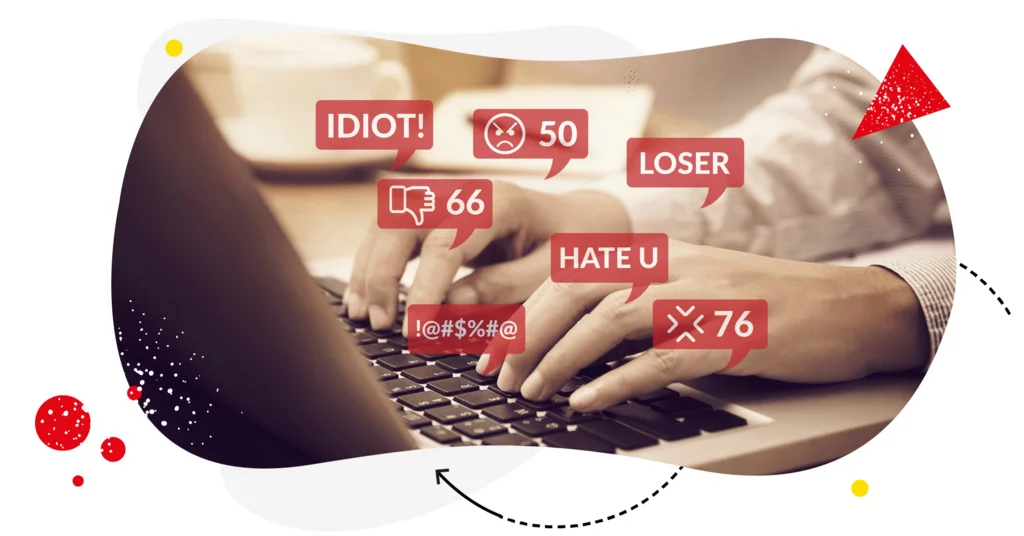

My sister works as a chat support specialist in a BPO company, where she manually manages customer product reviews for a specific product on social media. In this demonstration, I will showcase how Naive Bayes classification can be applied to analyze text data.

The main objective is to build a model that can predict whether a given message falls into a positive or negative category. While manually predicting the sentiment of a few messages is feasible, it becomes challenging when dealing with long reviews or even large volumes of reviews, such as hundreds or even thousands per day. Manually handling such a workload would require significant manpower and time.

Instead of manually reading and analyzing every message, we can leverage the power of the Naive Bayes classifier to quickly determine the sentiment distribution, i.e., how many messages are positive and how many are negative.

To achieve this, we need to train a model. This process involves counting the occurrences of each word in both the positive and negative categories. Let’s assume we have a training dataset that looks something like the example below:

### Training Samples

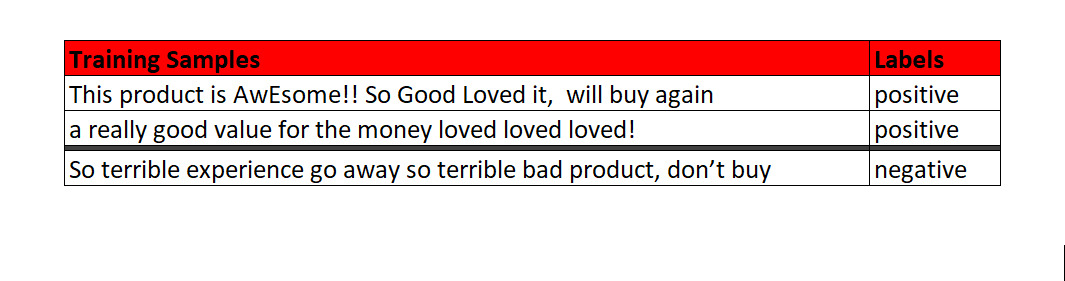

### Sample Cleaning Process:
The initial step in our analysis involves cleaning the samples by implementing a function capable of performing the following tasks:

1. Excluding everything except letters from the text.
2. Replacing multiple spaces with a single space.
3. Converting the text to lowercase.
4. Removing predefined prepositions from the cleaned string.

In [138]:
import re

# Define a list of common prepositions to be excluded
prepositions = ['this','is','so','it','in','on','at','by', 'the']

def preprocess_string(str_arg):
        """
        Parameters:
        ----------
        str_arg: example string to be preprocessed

        What the function does?
        -----------------------
        Preprocess the string argument - str_arg - such that:
        1. everything apart from letters is excluded
        2. multiple spaces are replaced by single space
        3. str_arg is converted to lower case 
        4. prepositions are excluded from the cleaned string

        Example:
        --------
        Input:  "Menu is absolutely perfect,loved it!"
        Output: "menu absolutely perfect loved"

        Returns:
        ---------
        Preprocessed string 

        """

        # Preprocess the string by excluding non-letter characters, replacing multiple spaces, and converting to lowercase
        cleaned_str = re.sub('[^a-z\s]+', ' ', str_arg, flags=re.IGNORECASE)
        cleaned_str = re.sub('(\s+)', ' ', cleaned_str)
        cleaned_str = cleaned_str.lower()

        # Remove prepositions from the cleaned string
        cleaned_str_words = cleaned_str.split()
        cleaned_str = ' '.join(word for word in cleaned_str_words if word not in prepositions)

        return cleaned_str

In [139]:
# example of cleaning 
sample1 = 'This product is AwEsome!! So Good Loved it, will buy again'
# fucntion call
preprocess_string(sample1) 

'product awesome good loved will buy again'

### The Bag of Words
After cleaning the samples, the dataset will be stored in a Bag of Words. It is a list that includes the count of occurrences of each word in the text or dataset, representing the frequency of each word.

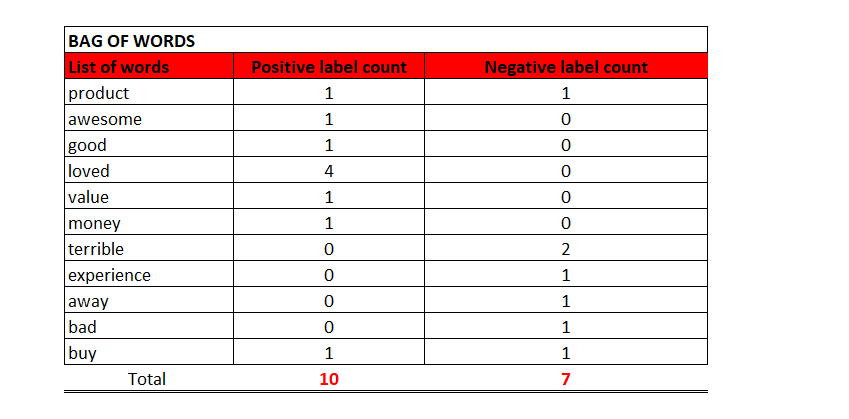

To prevent encountering zero probabilities, we employ a technique known as additive smoothing or Laplace smoothing. This technique involves adding a small value (usually 1) to the count of each unique word in the positive and negative bag of words.

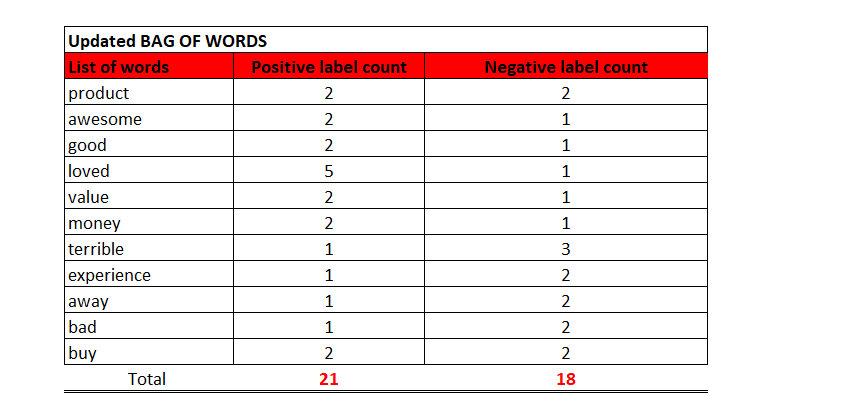

### Bayes Theorem 

Consider the scenario where we receive a new comment stating `'THIS product is TerRiBLE!! ;(`. After passing this comment through our `preprocess_string` function, the resulting cleaned string would be `'product terrible'`.

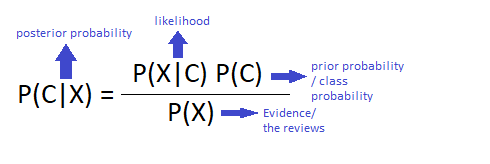

`1. p(C|X):` This represents the probability of the class (either positive or negative class) given the review (X). It is the posterior probability that we want to compute, i.e., the probability of the class being positive or negative given the review.

`2. p(X|C):` This is the likelihood probability, i.e., the probability of the review (X) being observed, given the class (positive or negative). It helps us model the likelihood of seeing a particular review given its class.

`3. p(C):` This is the class probability, which is the prior probability of a class (positive or negative) before observing any review. It represents the overall probability of a review being positive or negative, regardless of the specific content.

`4. p(X):` This is the probability of the sample review. In the context of Naive Bayes, it is usually ignored since it acts as a normalization constant and does not affect the classification decision. Thus, it is often omitted from the computations.

### Defining Variables

### - `Prior probability (class probability)`

In [2]:
# probability of positive class from training samples
# how many positive class are there in our total training sample above? (it's 2/3)
pp = 2/3

# probability of negative class
pn = 1/3

print(f'probability of positive class: {pp}')
print(f'probability of negative class: {pn}')

probability of positive class: 0.6666666666666666
probability of negative class: 0.3333333333333333


### - `Likelihood`

In order to enhance the clarity of our variables, we simplify the word "terrible" as "T" and the word "product" as "P".

In [3]:
# How many word 'product' are there in total count of positive class? 
# see above updated bag of words for positve label (it's 2/21)
# p(product|+)
pPp = 2/21
# p(terrible|-)
pTp = 1/21

# p(product|-)
pPn = 2/18
# p(terrible|-)
pTn = 3/18

print(f'probability of product given + : {pPp}')
print(f'probability of terrible given + : {pTp}')
print(f'probability of product given - : {pPn}')
print(f'probability of terible given - : {pPn}')

probability of product given + : 0.09523809523809523
probability of terrible given + : 0.047619047619047616
probability of product given - : 0.1111111111111111
probability of terible given - : 0.1111111111111111


### - `Evidence`

While this term, called "Evidence," acts as a common denominator for both positive and negative labels, we can omit it in our computation since it remains the same for both classes. However, for the sake of completeness and transparency, we will include this expression in our example.

In [32]:
# p(product) + p(terrible)
pPT = (pp*pPp*pTp) + (pn*pPn*pTn)
print(f'p(product terible): {pPT}')

p(product terible): 0.009196271101033006


#### Pluggin values

- probability of positive given product terrible

In [33]:
# p(+|PT) = p(P|+) * p(T|+) * p(+)
#           ----------------------
#               p(PT)

(pPp * pTp * pp) / pPT

0.32876712328767116

- probability of negative given product terrible

In [34]:
# p(-|PT) = p(P|-) * p(T|-) * p(-)
#           ----------------------
#               p(PT)

(pPn * pTn * pn) / pPT

0.6712328767123288

The results indicate that the review “THIS product is TerRiBLE!! ;(“ has a 32.88% probability of being classified as a positive label and a 67.12% probability of being classified as a negative label.

---

### Naive Bayes in Python

Naive Bayes class

In [77]:
class NaiveBayes:
    
    def __init__(self,unique_classes):
        
        self.classes=unique_classes # Constructor is simply passed with unique number of classes of the training set
        

    def addToBow(self,example,dict_index):
        
        '''
            Parameters:
            1. example 
            2. dict_index - implies to which BoW category this example belongs to
            What the function does?
            -----------------------
            It simply splits the example on the basis of space as a tokenizer and adds every tokenized word to
            its corresponding dictionary/BoW
            Returns:
            ---------
            Nothing
        
       '''
        
        if isinstance(example,np.ndarray): example=example[0]
     
        for token_word in example.split(): #for every word in preprocessed example
          
            self.bow_dicts[dict_index][token_word]+=1 #increment in its count
            
    def train(self,dataset,labels):
        
        '''
            Parameters:
            1. dataset - shape = (m X d)
            2. labels - shape = (m,)
            What the function does?
            -----------------------
            This is the training function which will train the Naive Bayes Model i.e compute a BoW for each
            category/class. 
            Returns:
            ---------
            Nothing
        
        '''
    
        self.examples=dataset
        self.labels=labels
        self.bow_dicts=np.array([defaultdict(lambda:0) for index in range(self.classes.shape[0])])
        
        #only convert to numpy arrays if initially not passed as numpy arrays - else its a useless recomputation
        
        if not isinstance(self.examples,np.ndarray): self.examples=np.array(self.examples)
        if not isinstance(self.labels,np.ndarray): self.labels=np.array(self.labels)
            
        #constructing BoW for each category
        for cat_index,cat in tqdm(enumerate(self.classes), total=len(self.classes), desc="Training"):
          
            all_cat_examples=self.examples[self.labels==cat] #filter all examples of category == cat
            
            #get examples preprocessed
            
            cleaned_examples=[preprocess_string(cat_example) for cat_example in all_cat_examples]
            
            cleaned_examples=pd.DataFrame(data=cleaned_examples)
            
            #now costruct BoW of this particular category
            np.apply_along_axis(self.addToBow,1,cleaned_examples,cat_index)
            
            
                
        ###################################################################################################
        
        '''
            Although we are done with the training of Naive Bayes Model BUT!!!!!!
            ------------------------------------------------------------------------------------
            Remember The Test Time Forumla ? : {for each word w [ count(w|c)+1 ] / [ count(c) + |V| + 1 ] } * p(c)
            ------------------------------------------------------------------------------------
            
            We are done with constructing of BoW for each category. But we need to precompute a few 
            other calculations at training time too:
            1. prior probability of each class - p(c)
            2. vocabulary |V| 
            3. denominator value of each class - [ count(c) + |V| + 1 ] 
            
            Reason for doing this precomputing calculations stuff ???
            ---------------------
            We can do all these 3 calculations at test time too BUT doing so means to re-compute these 
            again and again every time the test function will be called - this would significantly
            increase the computation time especially when we have a lot of test examples to classify!!!).  
            And moreover, it doensot make sense to repeatedly compute the same thing - 
            why do extra computations ???
            So we will precompute all of them & use them during test time to speed up predictions.
            
        '''
        
        ###################################################################################################
      
        prob_classes=np.empty(self.classes.shape[0])
        all_words=[]
        cat_word_counts=np.empty(self.classes.shape[0])
        for cat_index,cat in enumerate(self.classes):
           
            #Calculating prior probability p(c) for each class
            prob_classes[cat_index]=np.sum(self.labels==cat)/float(self.labels.shape[0]) 
            
            #Calculating total counts of all the words of each class 
            count=list(self.bow_dicts[cat_index].values())
            cat_word_counts[cat_index]=np.sum(np.array(list(self.bow_dicts[cat_index].values())))+1 # |v| is remaining to be added
            
            #get all words of this category                                
            all_words+=self.bow_dicts[cat_index].keys()
                                                     
        
        #combine all words of every category & make them unique to get vocabulary -V- of entire training set
        
        self.vocab=np.unique(np.array(all_words))
        self.vocab_length=self.vocab.shape[0]
                                  
        #computing denominator value                                      
        denoms=np.array([cat_word_counts[cat_index]+self.vocab_length+1 for cat_index,cat in enumerate(self.classes)])                                                                          
      
        '''
            Now that we have everything precomputed as well, its better to organize everything in a tuple 
            rather than to have a separate list for every thing.
            
            Every element of self.cats_info has a tuple of values
            Each tuple has a dict at index 0, prior probability at index 1, denominator value at index 2
        '''
        
        self.cats_info=[(self.bow_dicts[cat_index],prob_classes[cat_index],denoms[cat_index]) for cat_index,cat in enumerate(self.classes)]                               
        self.cats_info=np.array(self.cats_info)
        print('training complete')
                                              
    def getExampleProb(self,test_example):                                
        
        '''
            Parameters:
            -----------
            1. a single test example 
            What the function does?
            -----------------------
            Function that estimates posterior probability of the given test example
            Returns:
            ---------
            probability of test example in ALL CLASSES
        '''                                      
                                              
        likelihood_prob=np.zeros(self.classes.shape[0]) #to store probability w.r.t each class
        
        #finding probability w.r.t each class of the given test example
        for cat_index,cat in enumerate(self.classes): 
                             
            for test_token in test_example.split(): #split the test example and get p of each test word
                
                ####################################################################################
                                              
                #This loop computes : for each word w [ count(w|c)+1 ] / [ count(c) + |V| + 1 ]                               
                                              
                ####################################################################################                              
                
                #get total count of this test token from it's respective training dict to get numerator value                           
                test_token_counts=self.cats_info[cat_index][0].get(test_token,0)+1
                
                #now get likelihood of this test_token word                              
                test_token_prob=test_token_counts/float(self.cats_info[cat_index][2])                              
                
                #remember why taking log? To prevent underflow!
                likelihood_prob[cat_index]+=np.log(test_token_prob)
                                              
        # we have likelihood estimate of the given example against every class but we need posterior probility
        post_prob=np.empty(self.classes.shape[0])
        for cat_index,cat in enumerate(self.classes):
            post_prob[cat_index]=likelihood_prob[cat_index]+np.log(self.cats_info[cat_index][1])                                  
      
        return post_prob
    
   
    def test(self, test_set):
        '''
            Parameters:
            -----------
            1. A complete test set of shape (m,)

            What the function does?
            -----------------------
            Determines probability of each test example against all classes and predicts the label
            against which the class probability is maximum
            Returns:
            ---------
            Predictions of test examples - A single prediction against every test example
        '''       

        predictions = []  # to store prediction of each test example
        for example in tqdm(test_set, desc="Testing"):
            # preprocess the test example the same way we did for training set examples                                  
            cleaned_example = preprocess_string(example) 

            # simply get the posterior probability of every example                                  
            post_prob = self.getExampleProb(cleaned_example)  # get prob of this example for both classes

            # simply pick the max value and map against self.classes!
            predictions.append(self.classes[np.argmax(post_prob)])

        print('test complete')  # Move this line inside the function (after the loop) to be executed
        return np.array(predictions)

Show dataframe

In [1]:
import pandas as pd 

df = pd.read_csv('nb.csv')
print(df.shape)
df.head(20)

(10, 2)


,training samples,labels
0,This product is awEsome so good loved it will...,positive
1,a really good value for the money loved loved ...,positive
2,So terrible experience go away so terrible bad...,negative
3,Stupid! product hate it very much,negative
4,Very nice,positive
5,Worth of Money,positive
6,Super delicious,positive
7,I want more,positive
8,Do you wanna be a snowman,positive
9,I hate this product,negative


We are working with a very small dataset consisting of 10 rows and 2 columns.

Define X and y

In [79]:
X = df['training samples'].values
y = df['labels'].values

Train Test Split / labels

In [80]:
from sklearn.model_selection import train_test_split
import numpy as np 
# split data
train_data,test_data,train_labels,test_labels = train_test_split(X,y,
                                                                 shuffle=True,
                                                                 test_size=0.2,
                                                                 random_state=42,
                                                                 stratify=y)
labels=np.unique(train_labels)

Naive Bayes instance

In [81]:
nb=NaiveBayes(labels)

Training...

In [82]:
from collections import defaultdict
from tqdm import tqdm
# nb.train will do words cleaning for us
nb.train(train_data, train_labels)

Training: 100%|██████████| 2/2 [00:00<00:00, 2001.10it/s]

training complete


Evaluation...

In [87]:
# prediction of our x_test samples
y_predict = nb.test(test_data)
y_predict

Testing: 100%|██████████| 2/2 [00:00<?, ?it/s]

test complete


array(['negative', 'positive'], dtype='<U8')

Accuracy

In [88]:
# prediction vs. true labels (test_labels sometime set as y_test)
accuracy = np.sum(y_predict == test_labels)/float(test_labels.shape[0])
accuracy

1.0

Our model has made accurate predictions for our test samples. However, it's important to note that our dataset is small, consisting of only 10 samples, and the test data comprises just 2 samples.

***

# Try our Model in Big Data

In [2]:
df = pd.read_csv('labeledTrainData.tsv',sep='\t')
print(df.shape)
df.head()

(25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


Now, we are working with a dataset consisting of 25,000 rows and 3 columns.

In [93]:
# Define X and y
y = df.sentiment.values
X = df.review.values

# Split data
train_data,test_data,train_labels,test_labels=train_test_split(X,y,
                                                               shuffle=True,
                                                               test_size=0.25,
                                                               random_state=69,
                                                               stratify=y)
labels = np.unique(train_labels)

# naive bayes instance
nb = NaiveBayes(labels)

# training
# nb.train will do the words cleaning for us
nb.train(train_data,train_labels)

# Testing
# prediction for test_data (sometime set as x_test)
y_predict = nb.test(test_data)

Training: 100%|██████████| 2/2 [00:05<00:00,  2.90s/it]


training complete


Testing: 100%|██████████| 6250/6250 [00:10<00:00, 616.60it/s]

test complete


Accuracy

In [94]:
# prediction vs. true labels (test_labels sometime set as y_test)
accuracy = np.sum(y_predict == test_labels)/float(test_labels.shape[0])
accuracy

0.8424

Test model on a new comment

In [97]:
comment1 = ['i love you baby baby']
comment2 = ['i hate YOU very much Zzzz']
comment3 =  ['your always in my heart ;)']

In [113]:
comment1_predict = nb.test(comment1)
comment2_predict = nb.test(comment2)
comment3_predict = nb.test(comment3)
print(comment1 + list(comment1_predict))
print(comment2 + list(comment2_predict))
print(comment3 + list(comment3_predict))

Testing: 100%|██████████| 1/1 [00:00<?, ?it/s]


test complete


Testing: 100%|██████████| 1/1 [00:00<00:00, 1000.31it/s]


test complete


Testing: 100%|██████████| 1/1 [00:00<?, ?it/s]

test complete
['i love you baby baby', 1]
['i hate YOU very much Zzzz', 0]
['your always in my heart ;)', 1]


# Sklean Implementation

In this section, we will employ the Naive Bayes `MultinomialNB` class from the `sklearn` library.

In [114]:
import pandas as pd 
import numpy as np 
from collections import defaultdict
import re
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [131]:
df = pd.read_csv('labeledTrainData.tsv',sep='\t')
print(df.shape)
df.head()

(25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


#### Define X and y

In [140]:
y = df.sentiment.values
X = df.review.values

#### Cleaning data

In [141]:
# we clean on training data only (X)
X =[preprocess_string(i) for i in X]

In [142]:
# uncomment to view sample of cleaned reviews 
X[0]

'with all stuff going down moment with mj i ve started listening to his music watching odd documentary here and there watched wiz and watched moonwalker again maybe i just want to get a certain insight into guy who i thought was really cool eighties just to maybe make up my mind whether he guilty or innocent moonwalker part biography part feature film which i remember going to see cinema when was originally released some of has subtle messages about mj s feeling towards press and also obvious message of drugs are bad m kay br br visually impressive but of course all about michael jackson unless you remotely like mj anyway then you are going to hate and find boring some may call mj an egotist for consenting to making of movie but mj and most of his fans would say that he made for fans which if true really nice of him br br actual feature film bit when finally starts only for minutes or excluding smooth criminal sequence and joe pesci convincing as a psychopathic all powerful drug lord w

#### Split data

In [143]:
train_data,test_data,train_labels,test_labels=train_test_split(X,y,
                                                               shuffle=True,
                                                               test_size=0.25,
                                                               random_state=69,
                                                               stratify=y)

### Tranforming the train and test data to a MultinomialNB readable format.
#### Train data vectorize

In [149]:
# instantiate it's object
count_vect = CountVectorizer()

In [150]:
# do the computation then transform to a Naive Bayes readable format
train_data_vectorize = count_vect.fit_transform(train_data) 

#### Test data vectorize

In [151]:
# transforms only 'NOT FIT_TRANSFORM'
# we are doing the computation on the training data that were gonna use by our model learn,
# testing data are used for evaluation only but need to transform to the same format.
test_data_vectorize  = count_vect.transform(test_data) 

#### Naive Bayes MultinomialNB

In [152]:
# simply instantiate a Multinomial Naive Bayes object
clf = MultinomialNB() 

In [153]:
#calling the fit method and passing the train_data_counter and train_labels
clf.fit(train_data_vectorize, train_labels) 

MultinomialNB()

#### Evaluation

In [154]:
# using the test_data_counter (transformed test_data to a clf readable format)
y_predict = clf.predict(test_data_vectorize) 

In [155]:
y_predict

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [157]:
# Accuarcy same code
print(clf.score(test_data_counter, test_labels))
print (np.sum(y_predict == test_labels)/float(len(test_labels))) 

0.84736
0.84736


#### Testing

In [158]:
# Tranform first our comments, assuming that comments are already cleaned
c1 = count_vect.transform(comment1) 
c2 = count_vect.transform(comment2) 
c3 = count_vect.transform(comment3) 
print(comment1 + list(clf.predict(c1)))
print(comment2 + list(clf.predict(c2)))
print(comment3 + list(clf.predict(c3)))

['i love you baby baby', 1]
['i hate YOU very much Zzzz', 0]
['your always in my heart ;)', 1]


- fin